In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU

2024-05-16 13:11:42.974563: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Data preparation

In [2]:
# Load Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Create decoding dictionary
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Vectorize Data
tokenizer = Tokenizer(10000)
tokenizer.fit_on_sequences(train_data + test_data)
x_train = tokenizer.sequences_to_matrix(train_data)
x_test = tokenizer.sequences_to_matrix(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Model training and evaluation

In [3]:
model = Sequential([
    Dense(64, activation = LeakyReLU(), input_shape=(10000, )),
    Dropout(0.3),
    Dense(64, activation = LeakyReLU()),
    Dropout(0.3),
    Dense(64, activation = LeakyReLU()),
    Dense(1, activation = "sigmoid")
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['accuracy'])

history = model.fit(
    x=x_train,
    y=y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=1000
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6064 - loss: 0.4479 - val_accuracy: 0.8482 - val_loss: 0.1995
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8593 - loss: 0.1729 - val_accuracy: 0.8780 - val_loss: 0.1308
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9152 - loss: 0.0947 - val_accuracy: 0.8906 - val_loss: 0.1145
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9337 - loss: 0.0722 - val_accuracy: 0.8888 - val_loss: 0.1140
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9491 - loss: 0.0561 - val_accuracy: 0.8906 - val_loss: 0.1122
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9567 - loss: 0.0474 - val_accuracy: 0.8894 - val_loss: 0.1123
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9608 - loss: 0.0424 - val_accuracy: 0.8896 - val_loss: 0.1123
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9644 - loss: 0.0386 - val_accuracy: 0.8882 - v

In [4]:
model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8748 - loss: 0.1263


[0.12545941770076752, 0.8755599856376648]

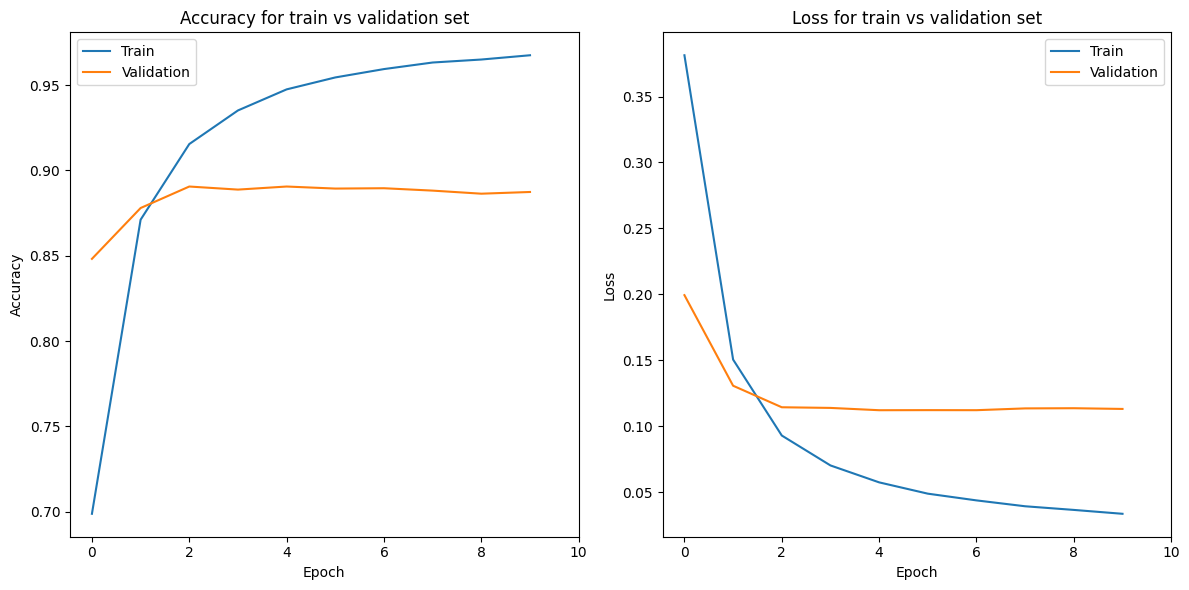

In [5]:
fig, (accuracy_plot, loss_plot) = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

accuracy_plot.plot(history.history['accuracy'])
accuracy_plot.plot(history.history['val_accuracy'])
accuracy_plot.set_title('Accuracy for train vs validation set')
accuracy_plot.set_xlabel('Epoch')
accuracy_plot.set_xticks([i for i in range(0, 11, 2)])
accuracy_plot.set_ylabel('Accuracy')
accuracy_plot.legend(['Train', 'Validation'])

loss_plot.plot(history.history['loss'])
loss_plot.plot(history.history['val_loss'])
loss_plot.set_title('Loss for train vs validation set')
loss_plot.set_xlabel('Epoch')
loss_plot.set_xticks([i for i in range(0, 11, 2)])
loss_plot.set_ylabel('Loss')
loss_plot.legend(['Train', 'Validation'])

fig.tight_layout()
plt.show()

## Save model

In [6]:
model.save('/Users/martinmurzenkov/Programming/portfolio/neural-networks/imdb/imdb.h5')